In [2]:
import pandas as pd

orig75_file = pd.read_csv('ref_75.txt', delimiter=' ', header = None)
#orig75_file.to_csv ('75p-Ref.csv', index=None)

orig50_file = pd.read_csv('ref_50.txt', delimiter=' ', header = None)
#orig50_file.to_csv ('50p-Ref.csv', index=None)

inf75_file = pd.read_csv ('imputed_vals_75.txt', delimiter=' ', header = None)
#inf75_file.to_csv ('75p-InfCSV.csv', index=None)

inf50_file = pd.read_csv ('inf_50.txt', delimiter=' ', header = None)
#inf50_file.to_csv ('50p-InfCSV.csv', index=None)

In [23]:
import pandas as pd

orig10_file = pd.read_csv('ref_10.txt', delimiter=' ', header = None)
#orig10_file.to_csv ('10p-Ref.csv', index=None)

inf10_file = pd.read_csv ('inf_10.txt', delimiter=' ', header = None)
#inf10_file.to_csv ('10p-InfCSV.csv', index=None)

In [24]:
inf01_file = pd.read_csv ('inf_01.txt', delimiter=' ', header = None)
#inf01_file.to_csv ('01p-InfCSV.csv', index=None)

In [74]:
inf001_file = pd.read_csv ('inf_001.txt', delimiter=' ', header = None)
#inf01_file.to_csv ('01p-InfCSV.csv', index=None)

In [80]:
inf0001_10k_file = pd.read_csv ('inf_0001_10kpeople.txt', delimiter=' ', header = None)

In [90]:
inf0001_5k_file = pd.read_csv ('in0001_5k.txt', delimiter=' ', header = None)

In [113]:
inf95_5k_file = pd.read_csv ('inf95_5k.txt', delimiter=' ', header = None)

In [114]:
inf99_5k_file = pd.read_csv ('inf99_5k.txt', delimiter=' ', header = None)

In [108]:
inf50_10k_file = pd.read_csv ('inf50_10k.txt', delimiter=' ', header = None)

In [3]:
inf001_10k_file = pd.read_csv ('inf_001_10kpeople.txt', delimiter=' ', header = None)
orig001_10k_file = pd.read_csv ('ref_001_10kpeople.txt', delimiter=' ', header = None)

In [4]:
import numpy as np

#np.savetxt('H75_out', H_75, delimiter=',')
#np.savetxt('H50_out', H_50, delimiter = ',')

In [11]:
#calculate probability distribution of reference:
pr_maj_ref = []
pr_hetero_ref = []
pr_min_ref = []

for loc in range(10000): #CHANGE HERE TOO
    f_maj = 0
    f_hetero = 0
    f_min = 0
    SNPs = orig001_10k_file.loc[loc, 5:] #change file name here

    for i in range(int((len(SNPs))/2)):
        if (SNPs.loc[5 +2*i] + SNPs.loc[5+2*i+1]) == 0:
            f_maj += 1
        elif (SNPs.loc[5 +2*i] + SNPs.loc[5+2*i+1]) == 1:
            f_hetero += 1
        elif (SNPs.loc[5 +2*i] + SNPs.loc[5+2*i+1]) == 2:
            f_min += 1
    #multiplying by 2 because len(SNPs) is 2x 
    pr_maj_ref.append(f_maj / len(SNPs) * 2.0)
    pr_hetero_ref.append(f_hetero / len(SNPs) * 2.0)
    pr_min_ref.append(f_min / len(SNPs) * 2.0)
    
#calculate probability distribution of imputation:
pr_maj_imp = []
pr_hetero_imp = []
pr_min_imp = []

for loc in range(5000):
    f_maj = 0
    f_hetero = 0
    f_min = 0
    SNPs = inf001_10k_file.loc[loc, 5:] #change imputed file name here

    for i in range(int((len(SNPs))/3)):
        f_maj += SNPs.loc[5 +3*i]
        f_hetero += SNPs.loc[5 + 3*i + 1]
        f_min += SNPs.loc[5 +3*i + 2]
    pr_maj_imp.append(f_maj / len(SNPs) * 3.0)
    pr_hetero_imp.append(f_hetero / len(SNPs) * 3.0)
    pr_min_imp.append(f_min / len(SNPs) * 3.0)
    
#find where imputation happens
imputed_indices = []
preserved_indices = []

for loc in range(len(pr_maj_imp)):
    chrom = inf001_10k_file.loc[loc, 0] #change imputed file name here
    if chrom == "22":
        preserved_indices.append(loc)
    else:
        imputed_indices.append(loc)


#calculating Hellinger score
import math
H_score = []


#having a machine epsilon problem...
for i in range(len(imputed_indices)):
    sqrt_sum = math.sqrt(pr_maj_ref[imputed_indices[i]] * pr_maj_imp[imputed_indices[i]]) + \
        math.sqrt(pr_hetero_ref[imputed_indices[i]] * pr_hetero_imp[imputed_indices[i]]) + \
        math.sqrt(pr_min_ref[imputed_indices[i]] * pr_min_imp[imputed_indices[i]])
    if sqrt_sum > 1.0:
        sqrt_sum = 1.0
    H_score.append(1 - math.sqrt(1-sqrt_sum))
    

#rename H_score
H_001_10k = H_score #change this name!

np.savetxt('H001_10k_11172020', H_001_10k, delimiter = ',') #SAVE HERE

KeyboardInterrupt: 

## 

print(max(H_01))
print(max(H_10))
print(max(H_50))
print(max(H_75))

In [103]:
#making violin plot of Hellinger score
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches
from itertools import repeat

red_patch = mpatches.Patch(color='blue')


#ax.set_ylim(0, 1)

#fake data
pos   = [1, 2,3,4,5,6, 7,8]
label = ['IMPUTE2 at 0.1%', 'IMPUTE2 at 0.1% 10k','IMPUTE2 at 1%', 'IMPUTE2 at 10%','IMPUTE2 at 50%', 'IMPUTE2 at 75%']
data  = [np.random.normal(size=100) for i in pos]



fake_handles = repeat(red_patch, len(pos))


bp = ax.violinplot([H_0001_5k, H_0001_10k, H_001, H_001_10k, H_01, H_10, H_50, H_75])
#ax.legend(label, loc = 'lower right')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(['0.01% 5k','0.01% 10k', '0.1% 5k', '0.1% 10k', '1% 5k', '10% 5k', '50% 5k', '75% 5k'])
plt.show()

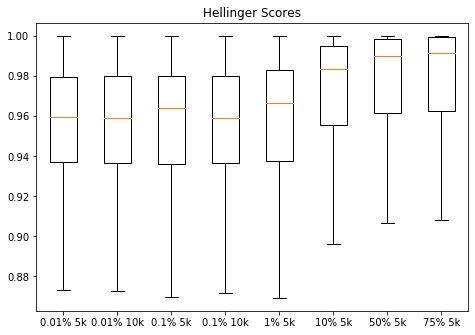

In [104]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['0.01% 5k', '0.01% 10k', '0.1% 5k', '0.1% 10k', '1% 5k', '10% 5k', '50% 5k', '75% 5k'])
ax.boxplot([H_0001_5k, H_0001_10k, H_001, H_001_10k, H_01, H_10, H_50, H_75], showfliers=False)
plt.title("Hellinger Scores")



plt.show()



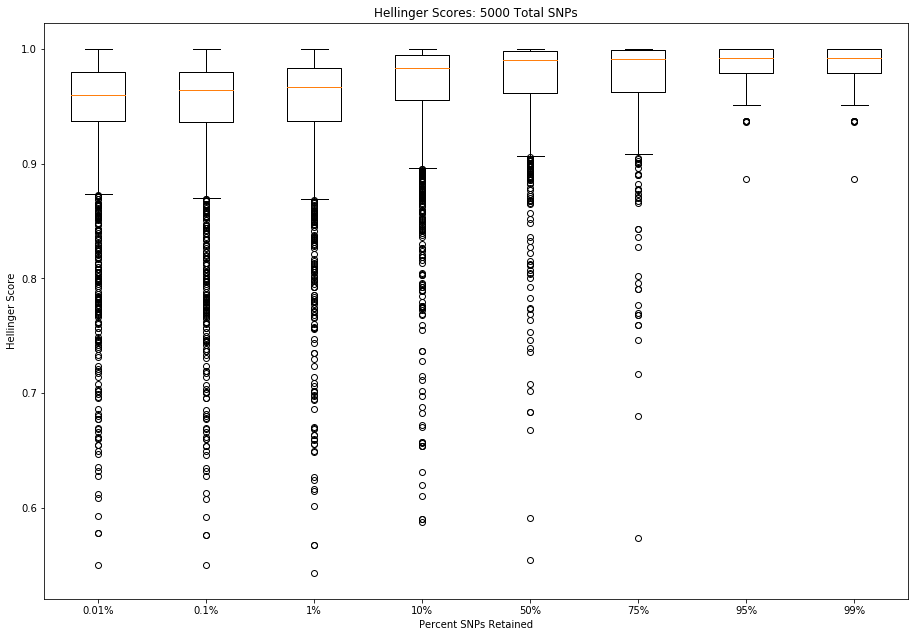

In [129]:
fig = plt.figure()

ax = fig.add_axes([0,0,2,2])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['0.01%','0.1%', '1%', '10%', '50%', '75%', '95%', '99%'])
ax.boxplot([H_0001_5k, H_001, H_01, H_10, H_50, H_75, H_95_5k, H_99_5k], showfliers=True)
plt.title("Hellinger Scores: 5000 Total SNPs")
plt.xlabel('Percent SNPs Retained')
plt.ylabel('Hellinger Score')



plt.show()




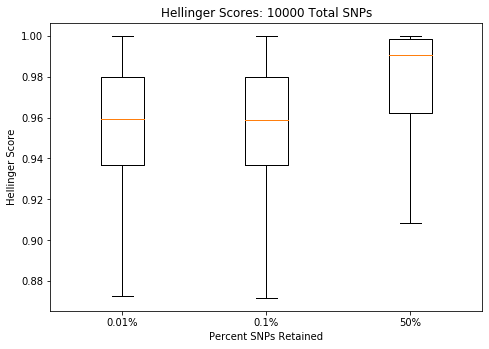

In [110]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['0.01%','0.1%', '50%'])
ax.boxplot([H_0001_10k, H_001_10k, H_50_10k], showfliers=False)
plt.title("Hellinger Scores: 10000 Total SNPs")
plt.xlabel('Percent SNPs Retained')
plt.ylabel('Hellinger Score')



plt.show()



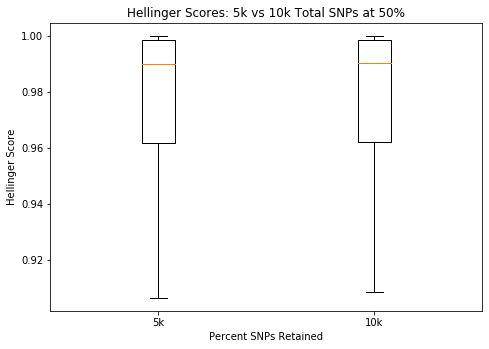

In [111]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['5k','10k'])
ax.boxplot([H_50, H_50_10k], showfliers=False)
plt.title("Hellinger Scores: 5k vs 10k Total SNPs at 50%")
plt.xlabel('Percent SNPs Retained')
plt.ylabel('Hellinger Score')



plt.show()




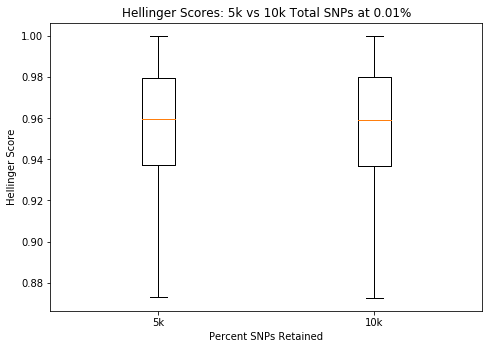

In [112]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['5k','10k'])
ax.boxplot([H_0001_5k, H_0001_10k], showfliers=False)
plt.title("Hellinger Scores: 5k vs 10k Total SNPs at 0.01%")
plt.xlabel('Percent SNPs Retained')
plt.ylabel('Hellinger Score')

plt.show()

In [122]:
print(min(H_001))
print(max(H_001))

0.5502763699797217
1.0


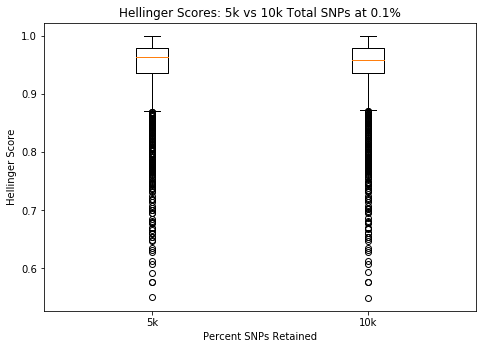

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches
from itertools import repeat



H_001_5k = pd.read_csv('H001_11102020.txt', header = None)

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['5k','10k'])
ax.boxplot([H_001_5k, H_001_10k], showfliers=True)
plt.title("Hellinger Scores: 5k vs 10k Total SNPs at 0.1%")
plt.xlabel('Percent SNPs Retained')
plt.ylabel('Hellinger Score')

plt.show()